In [12]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import h5py as h5
import tqdm
%matplotlib inline
reload(sa)
reload(sc)

<module 'neuraltda.simpComp' from '/home/brad/code/NeuralTDA/neuraltda/simpComp.pyc'>

In [13]:

blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#Load simplicial chain generator dictionary
scgfss = glob.glob(os.path.join(blockPath, 'scg/*.scg'))


In [14]:
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'.scg')
    fnames[p] = k
print(fnames)



{'Targ': ['Targ-correct-wide.scg', 'Targ-correct-narrow.scg', 'Targ-incorrect-wide.scg', 'Targ-incorrect-narrow.scg'], 'SD': ['SD-correct-wide.scg', 'SD-correct-narrow.scg', 'SD-incorrect-wide.scg', 'SD-incorrect-narrow.scg']}


In [15]:
def JS_vs_beta_pairwise(beta, scg_A, scg_B, d):
    '''
    Compute pairwise divergences between trials 
    for spike trains A and B represented as simplicial complexes
    '''
    divsave = []
    divincsave = []
    diffsave = []
    ntrials1 = len(scg_A)
    ntrials2 = len(scg_B)
    for ind in range(ntrials1):
        for ind2 in range(ntrials2):
            #print(stim1, t1, stim2, t2)
            scgAt = scg_A[ind] #SD
            scgBt = scg_B[ind2] #Targ
            div = sa.compute_JS_expanded(scgAt, scgBt, d, beta)
            divsave.append(float(div))
    m1 = np.mean(divsave)
    sd1 = np.std(divsave)

    return divsave

In [16]:
AllSave = {}

stim_hi = 'T40S40D3'
stim_lo = 'T3S3D40'
for tc, sdc in zip(fnames['SD'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgHi = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgLo = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise(beta,scgHi[stim_hi], scgLo[stim_lo], 1)
        msdActSave.append(divsave)
    AllSave[tc] = msdActSave
    
import pickle
with open('B604_1SLSE_pairwise_comparisons_attn_comparison_version3.pkl', 'wb') as out:
    pickle.dump(AllSave, out)
    

('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-wide.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-wide.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-narrow.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-narrow.scg')


100%|██████████| 20/20 [00:28<00:00,  1.47s/it]


('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T195953Z-10.0-5.0-13.0-SD-incorrect-wide.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T195953Z-10.0-5.0-13.0-SD-incorrect-wide.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T195953Z-10.0-5.0-13.0-SD-incorrect-narrow.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T195953Z-10.0-5.0-13.0-SD-incorrect-narrow.scg')


100%|██████████| 20/20 [00:07<00:00,  2.54it/s]


In [17]:
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'-shuffle.scg')
    fnames[p] = k
print(fnames)
AllSaveShuff = {}

stim_hi = 'T40S40D3'
stim_lo = 'T3S3D40'
for tc, sdc in zip(fnames['SD'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgHi = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgLo = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise(-1.0*beta,scgHi[stim_hi], scgLo[stim_lo], 1)
        msdActSave.append(divsave)
    AllSaveShuff[tc] = msdActSave
    
import pickle
with open('B604_1SLSE_pairwise_comparisons_attn_comparison_version3_shuffle.pkl', 'wb') as out:
    pickle.dump(AllSaveShuff, out)
    


{'Targ': ['Targ-correct-wide-shuffle.scg', 'Targ-correct-narrow-shuffle.scg', 'Targ-incorrect-wide-shuffle.scg', 'Targ-incorrect-narrow-shuffle.scg'], 'SD': ['SD-correct-wide-shuffle.scg', 'SD-correct-narrow-shuffle.scg', 'SD-incorrect-wide-shuffle.scg', 'SD-incorrect-narrow-shuffle.scg']}
('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-wide-shuffle.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-wide-shuffle.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-narrow-shuffle.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-narrow-shuffle.scg')


100%|██████████| 20/20 [00:24<00:00,  1.28s/it]


('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170509T154454Z-10.0-5.0-13.0-SD-incorrect-wide-shuffle.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170509T154454Z-10.0-5.0-13.0-SD-incorrect-wide-shuffle.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170509T154454Z-10.0-5.0-13.0-SD-incorrect-narrow-shuffle.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170509T154454Z-10.0-5.0-13.0-SD-incorrect-narrow-shuffle.scg')


100%|██████████| 20/20 [00:08<00:00,  1.97it/s]


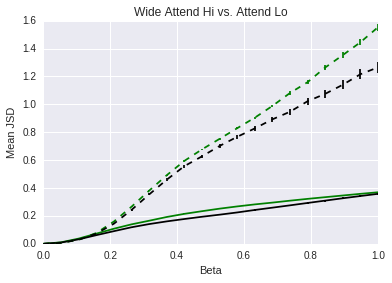

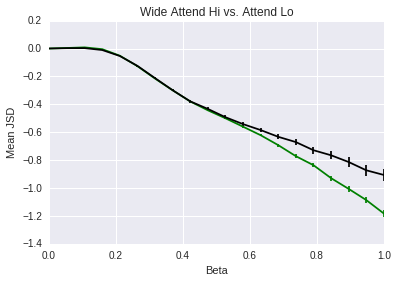

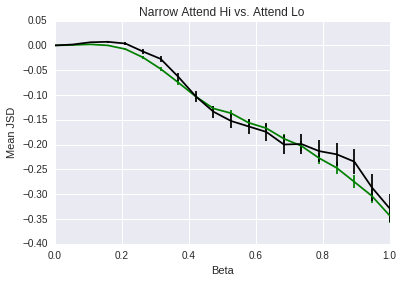

In [20]:
#Wide

cw = np.array(AllSave['SD-correct-wide.scg'])
xw = np.array(AllSave['SD-incorrect-wide.scg'])

cws = np.array(AllSaveShuff['SD-correct-wide-shuffle.scg'])
xws = np.array(AllSaveShuff['SD-incorrect-wide-shuffle.scg'])

cw_mean = np.mean(cw, axis=1)
xw_mean = np.mean(xw, axis=1)

cws_mean = np.mean(cws, axis=1)
xws_mean = np.mean(xws, axis=1)

cw_sem = np.std(cw, axis=1) / np.sqrt(np.shape(cw)[1])
xw_sem = np.std(xw, axis=1) / np.sqrt(np.shape(xw)[1])

cws_sem = np.std(cws, axis=1) / np.sqrt(np.shape(cws)[1])
xws_sem = np.std(xws, axis=1) / np.sqrt(np.shape(xws)[1])


plt.figure()
plt.errorbar(betas, cw_mean, fmt='g', yerr=cw_sem)
plt.errorbar(betas, xw_mean, fmt='k', yerr=xw_sem)
plt.errorbar(betas, cws_mean, fmt='g--', yerr=cws_sem)
plt.errorbar(betas, xws_mean, fmt='k--', yerr=xws_sem)
plt.title('Wide Attend Hi vs. Attend Lo')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')

plt.figure()
plt.errorbar(betas, cw_mean - cws_mean, fmt='g', yerr=np.sqrt(cw_sem**2 + cws_sem**2))
plt.errorbar(betas, xw_mean - xws_mean, fmt='k', yerr=np.sqrt(xw_sem**2 + xws_sem**2))

plt.title('Wide Attend Hi vs. Attend Lo')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')

#Narrow

cn = np.array(AllSave['SD-correct-narrow.scg'])
xn = np.array(AllSave['SD-incorrect-narrow.scg'])
cns = np.array(AllSaveShuff['SD-correct-narrow-shuffle.scg'])
xns = np.array(AllSaveShuff['SD-incorrect-narrow-shuffle.scg'])

cn_mean = np.mean(cn, axis=1)
xn_mean = np.mean(xn, axis=1)
cns_mean = np.mean(cns, axis=1)
xns_mean = np.mean(xns, axis=1)

cn_sem = np.std(cn, axis=1) / np.sqrt(np.shape(cn)[1])
xn_sem = np.std(xn, axis=1) / np.sqrt(np.shape(xn)[1])
cns_sem = np.std(cns, axis=1) / np.sqrt(np.shape(cns)[1])
xns_sem = np.std(xns, axis=1) / np.sqrt(np.shape(xns)[1])

plt.figure()
plt.errorbar(betas, cn_mean-cns_mean, fmt='g', yerr=np.sqrt(cn_sem**2 + cns_sem**2))
plt.errorbar(betas, xn_mean-xns_mean, fmt='k', yerr=np.sqrt(xn_sem**2 + xns_sem**2))
plt.title('Narrow Attend Hi vs. Attend Lo')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')

In [ ]:
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'.scg')
    fnames[p] = k
print(fnames)



AllSave = {}

stim_hi = 'T40S40D3'
stim_lo = 'T3S3D40'
for tc, sdc in zip(fnames['SD'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgHi = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgLo = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise(beta,scgHi[stim_hi], scgLo[stim_lo], 1)
        msdActSave.append(divsave)
    AllSave[tc] = msdActSave
    
import pickle
with open('B604_2SLSE_pairwise_comparisons_attn_comparison_version3.pkl', 'wb') as out:
    pickle.dump(AllSave, out)
    
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'-shuffle.scg')
    fnames[p] = k
print(fnames)
AllSaveShuff = {}

stim_hi = 'T40S40D3'
stim_lo = 'T3S3D40'
for tc, sdc in zip(fnames['SD'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgHi = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgLo = pickle.load(scgf)

    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise(-1.0*beta,scgHi[stim_hi], scgLo[stim_lo], 1)
        msdActSave.append(divsave)
    AllSaveShuff[tc] = msdActSave
    
import pickle
with open('B604_2SLSE_pairwise_comparisons_attn_comparison_version3_shuffle.pkl', 'wb') as out:
    pickle.dump(AllSaveShuff, out)
    

    